<img src="img/airbnb.png" width="600">
<a href="">Attribution to image site</a>

**Context**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

**Content**

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

**Acknowledgements**

This public dataset is part of Airbnb, and the original source can be found on this website.

**Inspiration**

What can we learn about different hosts and areas?

What can we learn from predictions? (ex: locations, prices, reviews, etc)

Which hosts are the busiest and why?

Is there any noticeable difference of traffic among different areas and what could be the reason for it?

### Import libraries

In [1]:
import os
import gc
import time
import re
from tqdm.notebook import tqdm as tqdm

import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.utils import shuffle

import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML, display

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [4]:
df.head()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.drop(['host_id','host_name'], axis=1,inplace=True)

In [6]:
df.columns

Index(['id', 'name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

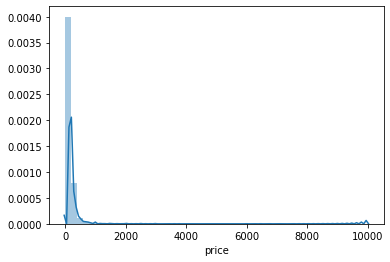

In [7]:
sns.distplot(df['price'])

In [8]:
#df.drop(labels=[45666, 30824], inplace=True)
df = df[(df['price']>0) & (df['price']<=250)]
df = df.reset_index(drop=True)

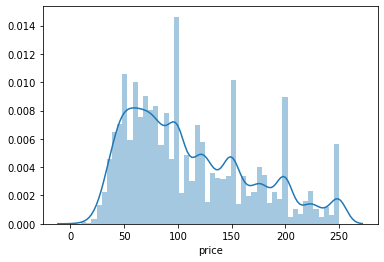

In [9]:
sns.distplot(df['price'])

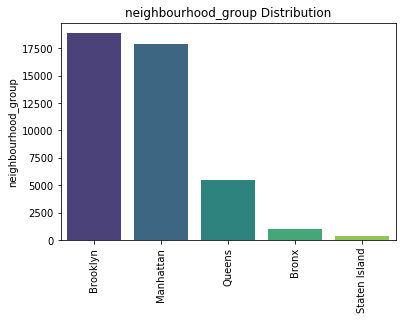

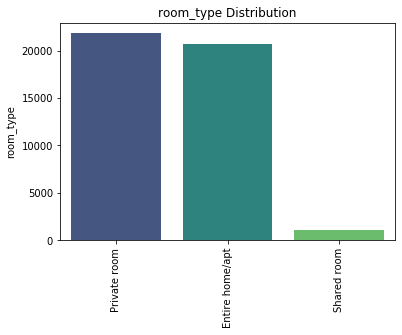

In [10]:
df_cat = df[['neighbourhood_group', 'room_type']]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    #print("Graph for %s: total = %d" % (i,len(cat_num)))
    plt.title(i + ' Distribution')
    chart = sns.barplot(x=cat_num.index, y=cat_num, palette='viridis')
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

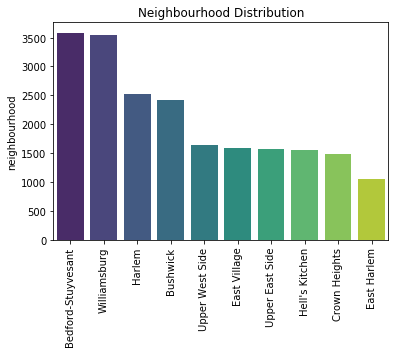

In [11]:
cat_lim = df['neighbourhood'].value_counts()[:10]
chart = sns.barplot(x=cat_lim.index, y=cat_lim, palette='viridis')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.title('Neighbourhood Distribution')
plt.show()

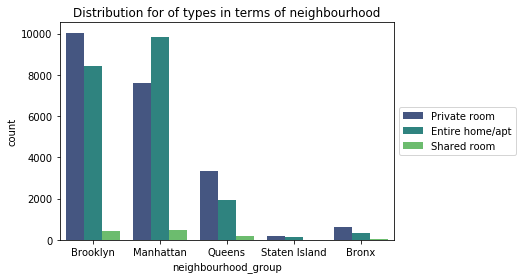

In [12]:
sns.countplot(x='neighbourhood_group', hue='room_type',data=df, palette='viridis')
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.title('Distribution for of types in terms of neighbourhood')
plt.show()

In [13]:
df.columns

Index(['id', 'name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

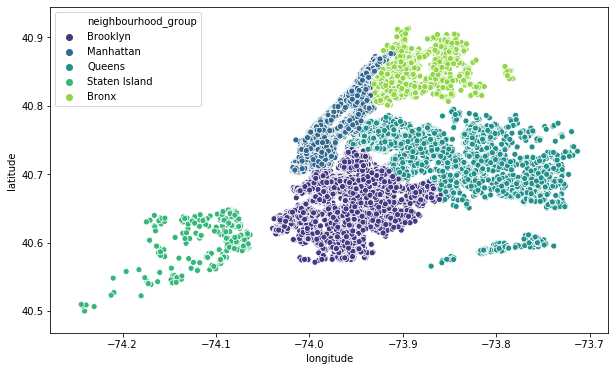

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group,palette='viridis')
plt.ioff()

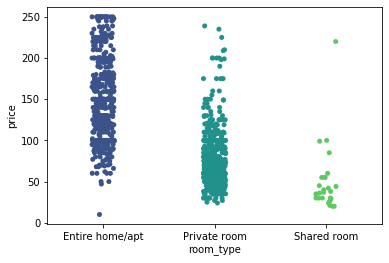

In [15]:
sns.stripplot(x='room_type',y='price',palette='viridis',data=df.sample(1000))

In [16]:
corpus = []
length = len(df['name'])
for i in tqdm(range(0,length)):   
    tags = re.sub('[^a-zA-Z]', ' ', str(df['name'][i]))
    tags = tags.lower()
    tags = tags.split()
    tags = [word for word in tags if not word in set(stopwords.words('english'))]
    tags = ' '.join(tags)
    corpus.append(tags)

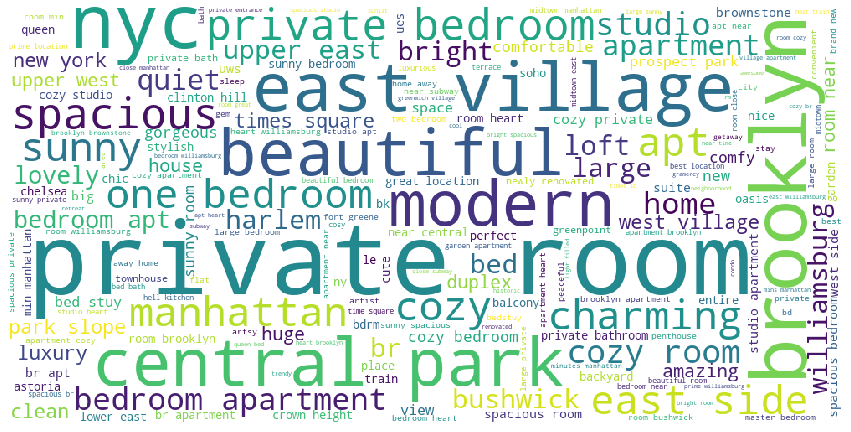

In [17]:
unique_string=(" ").join(corpus)
wordcloud = WordCloud(background_color='white', width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("General"+".png", bbox_inches='tight')
plt.show()
plt.close()

Just by looking at the correlations between each columns, applying models wouldn't be needed as to how the data is spread out.

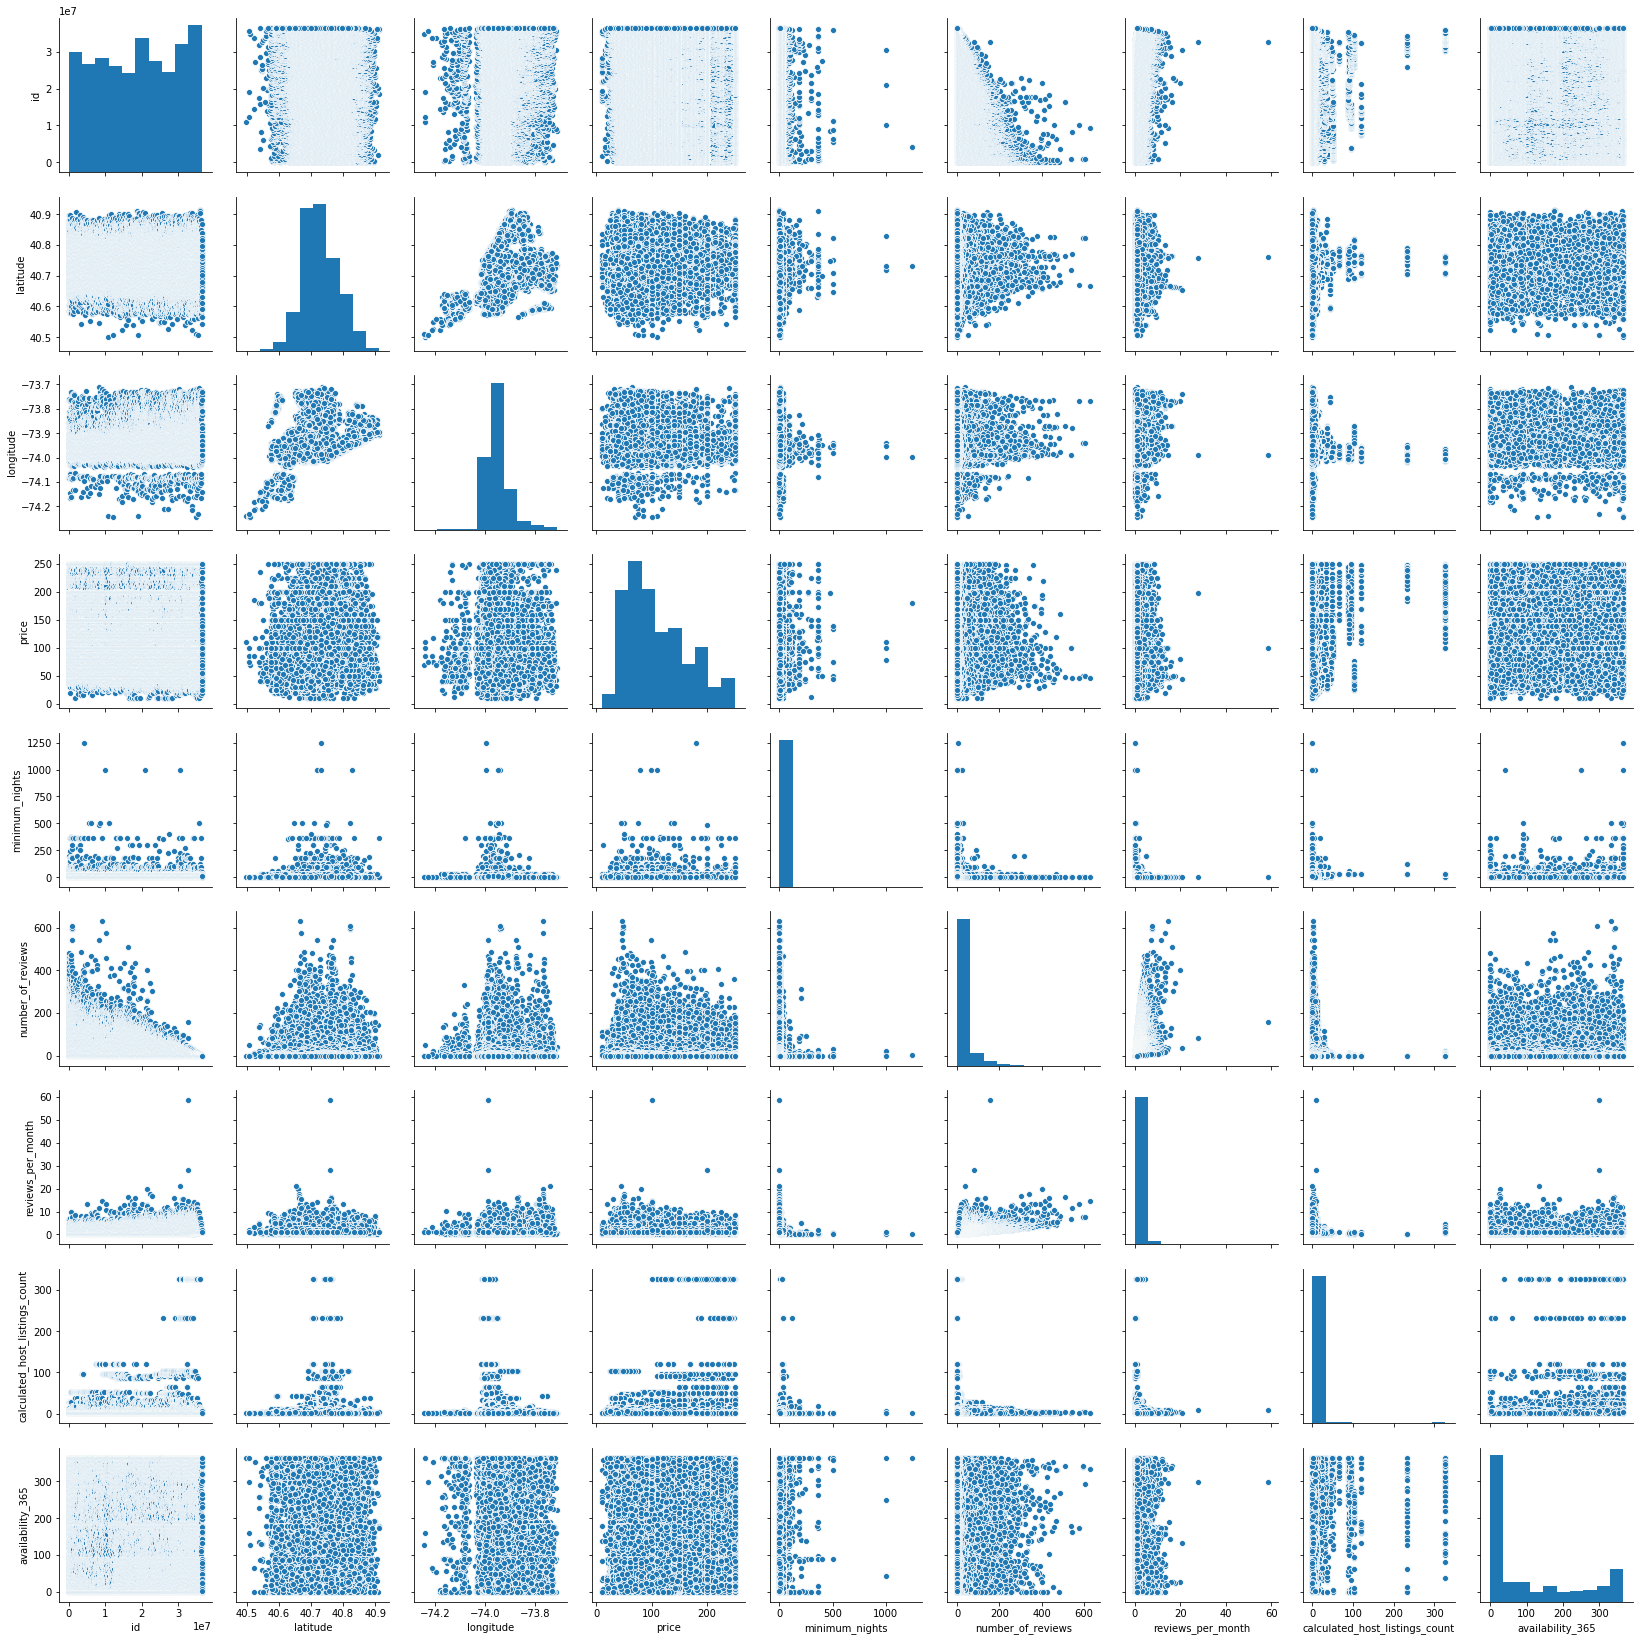

In [18]:
sns.pairplot(df)

### Reference
- https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb